# **Waze Project**
**Course 5 - Regression analysis: Simplify complex data relationships**

Your team is more than halfway through their user churn project. Earlier, you completed a project proposal, used Python to explore and analyze Waze’s user data, created data visualizations, and conducted a hypothesis test. Now, leadership wants your team to build a regression model to predict user churn based on a variety of variables.

Next task: to build a binomial logistic regression model and prepare an executive summary to share your results.

# **Course 5 End-of-course project: Regression modeling**

In this activity, you will build a binomial logistic regression model. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.
<br/>

**The purpose** of this project is to demostrate knowledge of exploratory data analysis (EDA) and a binomial logistic regression model.

**The goal** is to build a binomial logistic regression model and evaluate the model's performance.
<br/>

*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a binomial logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

<br/>

# **Build a regression model**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and data loading**
Import the data and packages that you've learned are needed for building logistic regression models.

In [1]:
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Logistic Regression & Confusion Matrix
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

Import the dataset

In [2]:
# Load the dataset by running this cell
df = pd.read_csv('waze_dataset.csv')

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question:

* What are some purposes of EDA before constructing a binomial logistic regression model?

    Some purpose of EDA:
    - get familiar with dataset (types, size, labels)
    - Understanding which variables are present in the data
    - Reviewing the distribution of features, such as minimum, mean, and maximum values
    - check requirement for any initial data transfornation or reshaping and make such transformation
    - check for missing data and deal with it
    - check for outliers and deal with it
    - Plotting the relationship between the independent and dependent variables to visualize which feature is the best choice for X

### **Task 2a. Explore data with EDA**

Analyze and discover data, looking for correlations, missing data, potential outliers, and/or duplicates.



Start with `.shape` and `info()`.

In [3]:
print(df.shape)
print(df.info())
df.isnull().sum()

(14999, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB
None


ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

**Question:** Are there any missing values in your data?

    We have 700 rows with missing data in "label" variable

Use `.head()`.



In [4]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


Use `.drop()` to remove the ID column since we don't need this information for your analysis.

In [3]:
df.drop("ID", inplace=True, axis=1)

Now, check the class balance of the dependent (target) variable, `label`.

In [7]:
df["label"].value_counts()

label
retained    11763
churned      2536
Name: count, dtype: int64

In [82]:
# the same but precentage
df['label'].value_counts(normalize=True)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

Call `.describe()` on the data.


In [8]:
df.describe(include="all")

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
count,14299,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,retained,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone
freq,11763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9672
mean,NaN,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,NaN
std,NaN,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,NaN
min,NaN,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,NaN
25%,NaN,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,NaN
50%,NaN,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,NaN
75%,NaN,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,NaN


**Question:** Are there any variables that could potentially have outliers just by assessing at the quartile values, standard deviation, and max values?

    number of variables has outliers mostly on right (max) side of the distribution, so most variables has right skewed distribution

### **Task 2b. Create features**

Create features that may be of interest to the stakeholder and/or that are needed to address the business scenario/problem.

#### **`km_per_driving_day`**

You know from earlier EDA that churn rate correlates with distance driven per driving day in the last month. It might be helpful to engineer a feature that captures this information.

1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [4]:
# 1. Create `km_per_driving_day` column
df["km_per_driving_day"] = df["driven_km_drives"] / df["driving_days"]

# 2. Call `describe()` on the new column
df["km_per_driving_day"].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

Note that some values are infinite. This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [5]:
# 1. Convert infinite values to zero
df["km_per_driving_day"] = df["km_per_driving_day"].map(lambda x: 0 if x == np.inf else x)

# 2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.
df["km_per_driving_day"].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

#### **`professional_driver`**

Create a new, binary feature called `professional_driver` that is a 1 for users who had 60 or more drives <u>**and**</u> drove on 15+ days in the last month.

**Note:** The objective is to create a new feature that separates professional drivers from other drivers. In this scenario, domain knowledge and intuition are used to determine these deciding thresholds, but ultimately they are arbitrary.

To create this column, use the [`np.where()`](https://numpy.org/doc/stable/reference/generated/numpy.where.html) function. This function accepts as arguments:
1. A condition
2. What to return when the condition is true
3. What to return when the condition is false

In [6]:
# Create `professional_driver` column
df["professional_driver"] = np.where((df["drives"] >= 60) & (df["driving_days"] >= 15), 1, 0)
df["professional_driver"].value_counts()

professional_driver
0    12405
1     2594
Name: count, dtype: int64

Perform a quick inspection of the new variable.

1. Check the count of professional drivers and non-professionals

2. Within each class (professional and non-professional) calculate the churn rate

In [16]:
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,professional_driver
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,1
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1246.901868,0
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,1


In [41]:
# 1. Check count of professionals and non-professionals
print(df["professional_driver"].value_counts())

# 2. Check in-class churn rate
df.groupby("professional_driver")["label"].value_counts(normalize=True)

professional_driver
0    12405
1     2594
Name: count, dtype: int64


professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: proportion, dtype: float64

The churn rate for professional drivers is 7.6%, while the churn rate for non-professionals is 19.9%. This seems like it could add predictive signal to the model.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model.

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

In this stage, consider the following question:

* Why did you select the X variables you did?

    'label' - y, dependent variable, which we want to predict    
    'sessions' - The number of drives and the number of sessions are both strongly correlated - choose 'drives' for model    
    'drives' - The number of drives and the number of sessions are both strongly correlated - choose 'drives' for model     
    'total_sessions' - keep it    
    'n_days_after_onboarding' - can be correlated    
    'total_navigations_fav1' - not really important but keep it for now    
    'total_navigations_fav2' - not really important but keep it for now    
    'driven_km_drives' - the more user drive the less likely he quite, so we will use this  
    'duration_minutes_drives' - the more user drive the less likely he quite, so we will use this   
    'activity_days' - not going to use, as it can be open by mistake    
    'driving_days' - important for model, the more often driving the less quit  
    'device' - not really important but keep it for now 
    'km_per_driving_day' - The churn rate tends to increase as the mean daily distance driven increases 
    'professional_driver' - this additional feature we created as it is kind of special drivers 

### **Task 3a. Preparing variables**

Call `info()` on the dataframe to check the data type of the `label` variable and to verify if there are any missing values.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
 12  km_per_driving_day       14999 non-null  float64
 13  professional_driver      14999 non-null  int32  
dtypes: float64(4), int32(1

Because you know from previous EDA that there is no evidence of a non-random cause of the 700 missing values in the `label` column, and because these observations comprise less than 5% of the data, use the `dropna()` method to drop the rows that are missing this data.

In [7]:
# Drop rows with missing data in `label` column
df.dropna(inplace=True)

#### **Impute outliers**

You rarely want to drop outliers, and generally will not do so unless there is a clear reason for it (e.g., typographic errors).

At times outliers can be changed to the **median, mean, 95th percentile, etc.**

Previously, you determined that seven of the variables had clear signs of containing outliers:

* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`

For this analysis, impute the outlying values for these columns. Calculate the **95th percentile** of each column and change to this value any value in the column that exceeds it.


In [8]:
def value_for_outliers(data):
    # Set the upper limit as threshold 95%
    upper_limit = data.quantile(0.95)

    # return modified dataframe
    return data.map(lambda x: upper_limit if x > upper_limit else x)

In [9]:
# Impute outliers
columns_to_convert = ["sessions", "drives", "total_sessions", "total_navigations_fav1", "total_navigations_fav2",
                      "driven_km_drives", "duration_minutes_drives"]
for column in columns_to_convert:
    df[column] = value_for_outliers( df[column])

Call `describe()`.

In [10]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,12.182530,581.942399,0.173998
std,67.243178,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,7.833835,1038.254509,0.379121
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761,0.000000
max,243.000000,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,30.000000,15420.234110,1.000000


#### **Encode categorical variables**

Change the data type of the `label` column to be binary. This change is needed to train a logistic regression model.

Assign a `0` for all `retained` users.

Assign a `1` for all `churned` users.

Save this variable as `label2` as to not overwrite the original `label` variable.

**Note:** There are many ways to do this. Consider using `np.where()` as you did earlier in this notebook.

In [11]:
# Create binary `label2` column
df["label2"] = np.where(df["label"] == "retained", 0, 1)
df["label2"].value_counts()

label2
0    11763
1     2536
Name: count, dtype: int64

### **Task 3b. Determine whether assumptions have been met**

The following are the assumptions for logistic regression:

* Independent observations (This refers to how the data was collected.)

* No extreme outliers

* Little to no multicollinearity among X predictors

* Linear relationship between X and the **logit** of y

For the first assumption, you can assume that observations are independent for this project.

The second assumption has already been addressed.

The last assumption will be verified after modeling.

**Note:** In practice, modeling assumptions are often violated, and depending on the specifics of your use case and the severity of the violation, it might not affect your model much at all or it will result in a failed model.

#### **Collinearity**

Check the correlation among predictor variables. First, generate a correlation matrix.

In [12]:
# Generate a correlation matrix
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,label2
sessions,1.000000,0.996942,0.597189,0.007101,0.001858,0.008536,0.002996,-0.004545,0.025113,0.020294,-0.011569,0.443654,0.034911
drives,0.996942,1.000000,0.595285,0.006940,0.001058,0.009505,0.003445,-0.003889,0.024357,0.019608,-0.010989,0.444425,0.035865
total_sessions,0.597189,0.595285,1.000000,0.006596,0.000187,0.010371,0.001016,-0.000338,0.015755,0.012953,-0.016167,0.254433,0.024568
n_days_after_onboarding,0.007101,0.006940,0.006596,1.000000,-0.002450,-0.004968,-0.004652,-0.010167,-0.009418,-0.007321,0.011764,0.003770,-0.129263
total_navigations_fav1,0.001858,0.001058,0.000187,-0.002450,1.000000,0.002866,-0.007368,0.005646,0.010902,0.010419,-0.000197,-0.000224,0.052322
total_navigations_fav2,0.008536,0.009505,0.010371,-0.004968,0.002866,1.000000,0.003559,-0.003009,-0.004425,0.002000,0.006751,0.007126,0.015032
driven_km_drives,0.002996,0.003445,0.001016,-0.004652,-0.007368,0.003559,1.000000,0.690515,-0.007441,-0.009549,0.344811,-0.000904,0.019767
duration_minutes_drives,-0.004545,-0.003889,-0.000338,-0.010167,0.005646,-0.003009,0.690515,1.000000,-0.007895,-0.009425,0.239627,-0.012128,0.040407
activity_days,0.025113,0.024357,0.015755,-0.009418,0.010902,-0.004425,-0.007441,-0.007895,1.000000,0.947687,-0.397433,0.453825,-0.303851
driving_days,0.020294,0.019608,0.012953,-0.007321,0.010419,0.002000,-0.009549,-0.009425,0.947687,1.000000,-0.407917,0.469776,-0.294259


Now, plot a correlation heatmap.

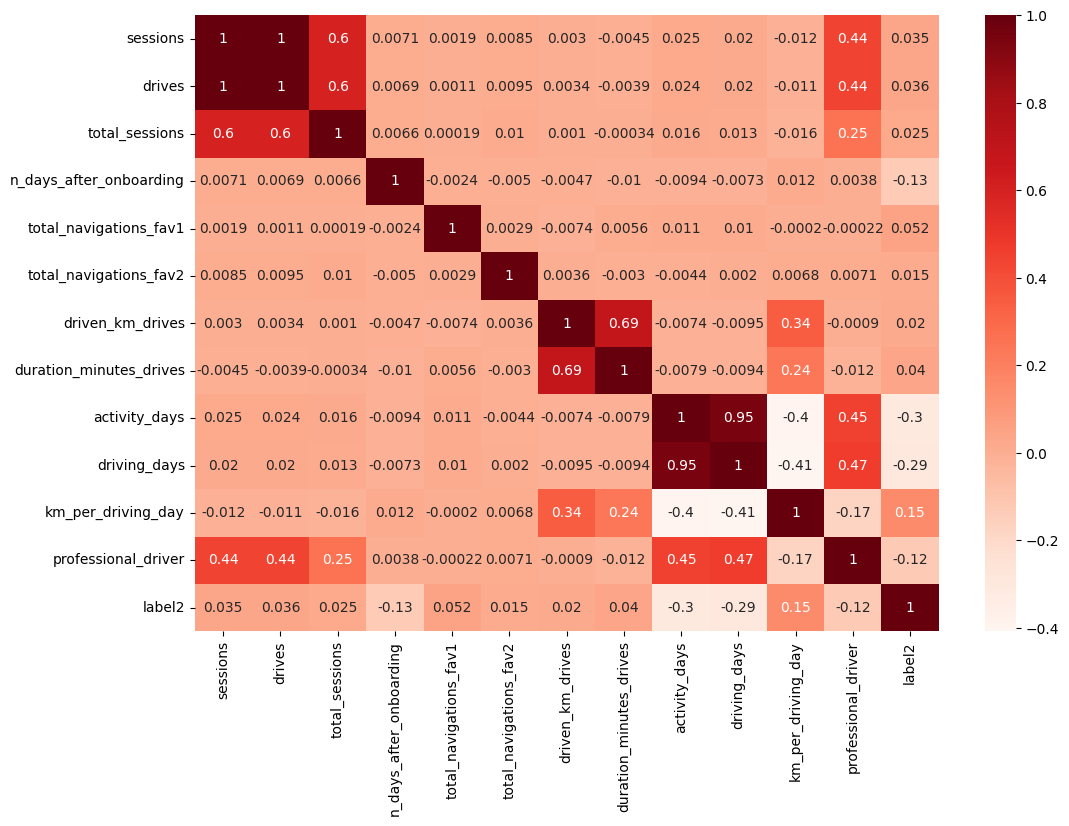

In [13]:
# Plot correlation heatmap
plt.figure(figsize = (12,8))
ax = sns.heatmap(corr_matrix, cmap = 'Reds', annot=True)
plt.show();

If there are predictor variables that have a Pearson correlation coefficient value greater than the **absolute value of 0.7**, these variables are strongly multicollinear. Therefore, only one of these variables should be used in your model.

**Note:** 0.7 is an arbitrary threshold. Some industries may use 0.6, 0.8, etc.

**Question:** Which variables are multicollinear with each other?

    there are two pair of variables highly correlated with each other:  
    drives & sessions (a Pearson correlation coefficient value = 1)     
    driving_days & activity_days (a Pearson correlation coefficient value = 0.95)

### **Task 3c. Create dummies (if necessary)**

If you have selected `device` as an X variable, you will need to create dummy variables since this variable is categorical.

In cases with many categorical variables, you can use pandas built-in [`pd.get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), or you can use scikit-learn's [`OneHotEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) function.

**Note:** Variables with many categories should only be dummied if absolutely necessary. Each category will result in a coefficient for your model which can lead to overfitting.

Because this dataset only has one remaining categorical feature (`device`), it's not necessary to use one of these special functions. You can just implement the transformation directly.

Create a new, binary column called `device2` that encodes user devices as follows:

* `Android` -> `0`
* `iPhone` -> `1`

In [58]:
df["device"].value_counts()

device
iPhone     9225
Android    5074
Name: count, dtype: int64

In [14]:
# Create new `device2` variable
df["device2"] = pd.get_dummies(df["device"], drop_first=True).astype(float)
df["device2"].value_counts()

device2
1.0    9225
0.0    5074
Name: count, dtype: int64

### **Task 3d. Model building**

#### **Assign predictor variables and target**

To build your model you need to determine what X variables you want to include in your model to predict your target&mdash;`label2`.

Drop the following variables and assign the results to `X`:

* `label` (this is the target)
* `label2` (this is the target)
* `device` (this is the non-binary-encoded categorical variable)
* `sessions` (this had high multicollinearity)
* `driving_days` (this had high multicollinearity)

**Note:** Notice that `sessions` and `driving_days` were selected to be dropped, rather than `drives` and `activity_days`. The reason for this is that the features that were kept for modeling had slightly stronger correlations with the target variable than the features that were dropped.

In [15]:
# Isolate predictor variables
X = df.drop(["label", "label2", "device", "sessions", "driving_days"], axis=1)
X.dtypes

drives                     float64
total_sessions             float64
n_days_after_onboarding      int64
total_navigations_fav1     float64
total_navigations_fav2     float64
driven_km_drives           float64
duration_minutes_drives    float64
activity_days                int64
km_per_driving_day         float64
professional_driver          int32
device2                    float64
dtype: object

Now, isolate the dependent (target) variable. Assign it to a variable called `y`.

In [16]:
# Isolate target variable
y = df["label2"]

#### **Split the data**

Use scikit-learn's [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to perform a train/test split on your data using the X and y variables you assigned above.

**Note 1:** It is important to do a train test to obtain accurate predictions.  You always want to fit your model on your training set and evaluate your model on your test set to avoid data leakage.

**Note 2:** Because the target class is imbalanced (82% retained vs. 18% churned), you want to make sure that you don't get an unlucky split that over- or under-represents the frequency of the minority class. Set the function's `stratify` parameter to `y` to ensure that the minority class appears in both train and test sets in the same proportion that it does in the overall dataset.

In [17]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Use .head()
X_train.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2
12733,77.0,232.483988,846,195.0,57.0,6910.461120,4604.745753,8,863.807640,0,1.0
8979,25.0,145.752582,1070,20.0,0.0,5774.596813,4444.164646,25,320.810934,0,1.0
11538,15.0,106.697795,905,174.0,2.0,1069.830723,615.840084,30,44.576280,0,1.0
11753,83.0,398.088846,2730,131.0,103.0,9923.950541,1187.541059,7,1538.836090,0,1.0
13647,119.0,457.536134,1967,16.0,29.0,3867.950258,2810.682351,16,322.329188,0,0.0


Use scikit-learn to instantiate a logistic regression model. Add the argument `penalty = None`.

It is important to add `penalty = None` since your predictors are unscaled.

Refer to scikit-learn's [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) documentation for more information.

Fit the model on `X_train` and `y_train`.

In [23]:
model = LogisticRegression(penalty=None, max_iter=400)
model.fit(X_train, y_train)

LogisticRegression(max_iter=400, penalty=None)

Call the `.coef_` attribute on the model to get the coefficients of each variable.  The coefficients are in order of how the variables are listed in the dataset.  Remember that the coefficients represent the change in the **log odds** of the target variable for **every one unit increase in X**.

If you want, create a series whose index is the column names and whose values are the coefficients in `model.coef_`.

In [24]:
pd.DataFrame(model.coef_, columns=X_test.columns).T

,0
drives,0.001973
total_sessions,0.000300
n_days_after_onboarding,-0.000386
total_navigations_fav1,0.001295
total_navigations_fav2,0.001205
driven_km_drives,-0.000038
duration_minutes_drives,0.000120
activity_days,-0.104364
km_per_driving_day,0.000016
professional_driver,-0.001529


Call the model's `intercept_` attribute to get the intercept of the model.

In [25]:
model.intercept_

array([-0.0016857])

#### **Check final assumption**

Verify the linear relationship between X and the estimated log odds (known as logits) by making a regplot.

Call the model's `predict_proba()` method to generate the probability of response for each sample in the training data. (The training data is the argument to the method.) Assign the result to a variable called `training_probabilities`. This results in a 2-D array where each row represents a user in `X_train`. The first column is the probability of the user not churning, and the second column is the probability of the user churning.

In [26]:
# Get the predicted probabilities of the training data
y_train_pred = model.predict_proba(X_train)

In [33]:
y_train_pred

array([[0.57821256, 0.42178744],
       [0.92988869, 0.07011131],
       [0.95927889, 0.04072111],
       ...,
       [0.84039784, 0.15960216],
       [0.74869319, 0.25130681],
       [0.87205627, 0.12794373]])

In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear. Here is the formula for calculating log-odds, where _p_ is the probability of response:
<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$
<br>

1. Create a dataframe called `logit_data` that is a copy of `df`.

2. Create a new column called `logit` in the `logit_data` dataframe. The data in this column should represent the logit for each user.


In [22]:
y_train_pred[0][0] + y_train_pred[0][1]

1.0

In [34]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data["logit"] = [np.log((y_train_pred[i][1] / y_train_pred[i][0])) for i in range(len(y_train_pred))]
logit_data.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2,logit
12733,77.0,232.483988,846,195.0,57.0,6910.461120,4604.745753,8,863.807640,0,1.0,-0.315440
8979,25.0,145.752582,1070,20.0,0.0,5774.596813,4444.164646,25,320.810934,0,1.0,-2.584981
11538,15.0,106.697795,905,174.0,2.0,1069.830723,615.840084,30,44.576280,0,1.0,-3.159435
11753,83.0,398.088846,2730,131.0,103.0,8898.716275,1187.541059,7,1538.836090,0,1.0,-1.378177
13647,119.0,455.439492,1967,16.0,29.0,3867.950258,2810.682351,16,322.329188,0,0.0,-1.807022


Plot a regplot where the x-axis represents an independent variable and the y-axis represents the log-odds of the predicted probabilities.

In an exhaustive analysis, this would be plotted for each continuous or discrete predictor variable. Here we show only `driving_days`.

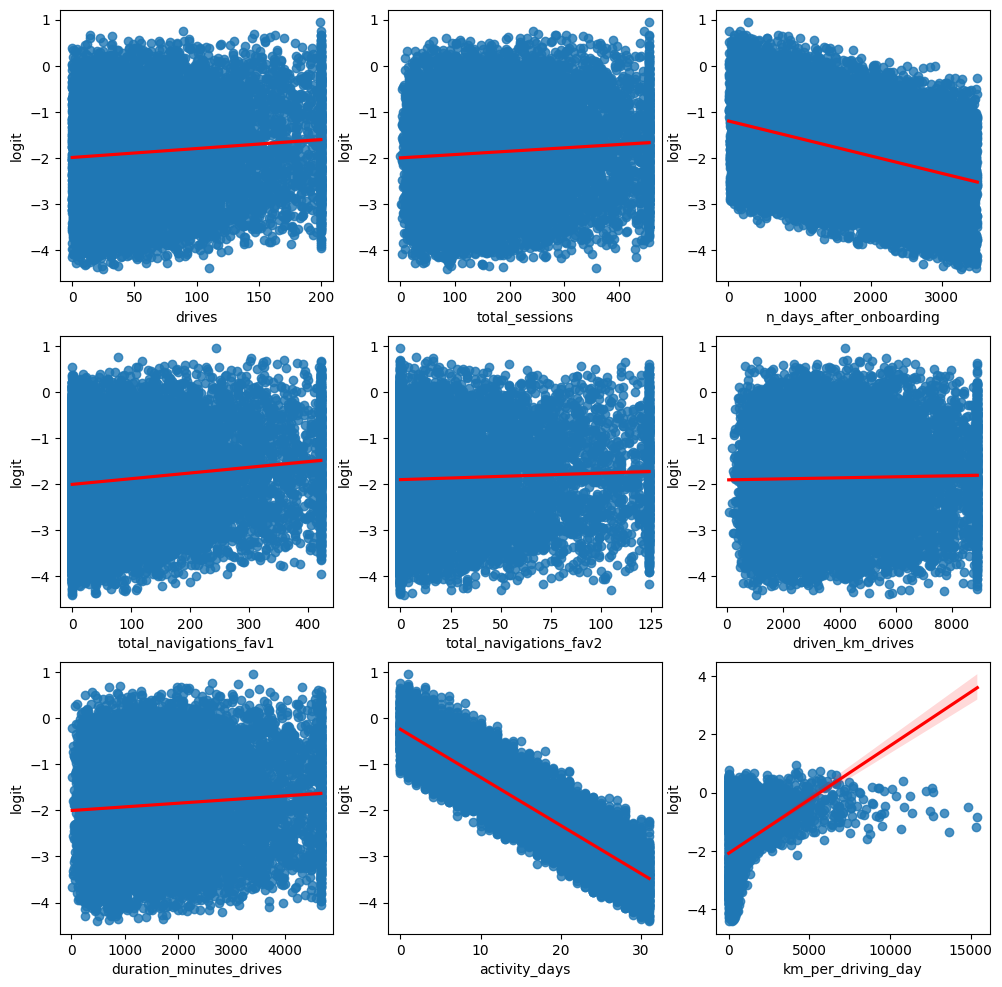

In [35]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,12))
sns.regplot(data=logit_data, x="drives", y="logit", line_kws={'color':'red'}, ax=ax[0][0]);
sns.regplot(data=logit_data, x="total_sessions", y="logit", line_kws={'color':'red'}, ax=ax[0][1]);
sns.regplot(data=logit_data, x="n_days_after_onboarding", y="logit", line_kws={'color':'red'}, ax=ax[0][2]);
sns.regplot(data=logit_data, x="total_navigations_fav1", y="logit", line_kws={'color':'red'}, ax=ax[1][0]);
sns.regplot(data=logit_data, x="total_navigations_fav2", y="logit", line_kws={'color':'red'}, ax=ax[1][1]);
sns.regplot(data=logit_data, x="driven_km_drives", y="logit", line_kws={'color':'red'}, ax=ax[1][2]);
sns.regplot(data=logit_data, x="duration_minutes_drives", y="logit", line_kws={'color':'red'}, ax=ax[2][0]);
sns.regplot(data=logit_data, x="activity_days", y="logit", line_kws={'color':'red'}, ax=ax[2][1]);
sns.regplot(data=logit_data, x="km_per_driving_day", y="logit", line_kws={'color':'red'}, ax=ax[2][2]);


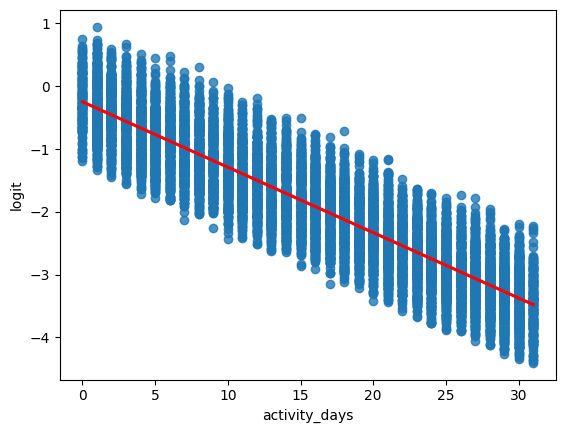

In [36]:
# Plot regplot of `activity_days` log-odds
plt.Figure(figsize=(6,6))
sns.regplot(data=logit_data, x="activity_days", y="logit", line_kws={'color':'red'});

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4a. Results and evaluation**

If the logistic assumptions are met, the model results can be appropriately interpreted.

Use the code block below to make predictions on the test data.


In [29]:
# Generate predictions on X_test
y_pred = model.predict(X_test)

Now, use the `score()` method on the model with `X_test` and `y_test` as its two arguments. The default score in scikit-learn is **accuracy**.  What is the accuracy of your model?

*Consider:  Is accuracy the best metric to use to evaluate this model?*

In [30]:
# Score the model (accuracy) on the test data
model.score(X_test, y_test)

0.8244755244755245

### **Task 4b. Show results with a confusion matrix**

Use the `confusion_matrix` function to obtain a confusion matrix. Use `y_test` and `y_preds` as arguments.

In [31]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = model.classes_)
print(cm)

[[2309   28]
 [ 474   49]]


Next, use the `ConfusionMatrixDisplay()` function to display the confusion matrix from the above cell, passing the confusion matrix you just created as its argument.

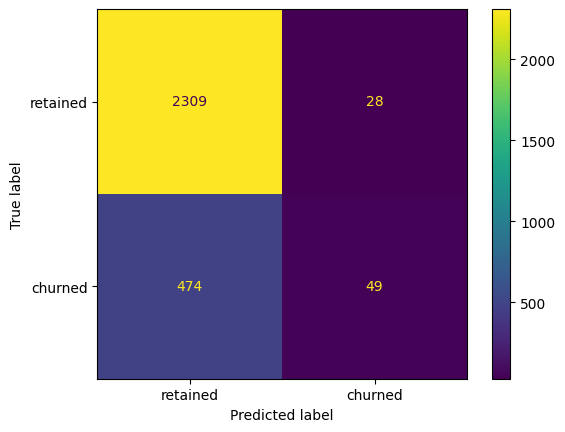

In [38]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                      display_labels=['retained', 'churned'])
disp.plot()
plt.show();

You can use the confusion matrix to compute precision and recall manually. You can also use scikit-learn's [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function to generate a table from `y_test` and `y_preds`.

In [39]:
# Calculate precision manually
precision = cm[1][1] / (cm[1][1] + cm[0][1])
print(f"Precision (manually calculated): {precision}")

Precision (manually calculated): 0.6363636363636364


In [42]:
# Calculate recall manually
recall = cm[1,1] / (cm[1, 0] + cm[1, 1])
print(f"Recall (manually calculated): {recall}")

Recall (manually calculated): 0.09369024856596558


In [41]:
# Create a classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2337
           1       0.64      0.09      0.16       523

    accuracy                           0.82      2860
   macro avg       0.73      0.54      0.53      2860
weighted avg       0.79      0.82      0.77      2860



In [48]:
print(f"Model precision score: {metrics.precision_score(y_test, y_pred):.2f}")
print(f"Model recall score: {metrics.recall_score(y_test, y_pred):.2f}")
print(f"Model accuracy score: {metrics.accuracy_score(y_test, y_pred):.2f}")
print(f"Model f1-score: {metrics.f1_score(y_test, y_pred):.2f}")

Model precision score: 0.64
Model recall score: 0.09
Model accuracy score: 0.82
Model f1-score: 0.16


**Note:** The model has decent precision but very low recall, which means that it makes a lot of false negative predictions and fails to capture users who will churn.

### **BONUS**

Generate a bar graph of the model's coefficients for a visual representation of the importance of the model's features.

In [ ]:
pd.DataFrame(model.coef_, columns=X_test.columns).T

In [59]:
X_test.columns[0]

'drives'

In [44]:
# Create a list of (column_name, coefficient) tuples
temp_list = list(zip(X_test.columns, model.coef_[0]))

# Sort the list by coefficient value
temp_list.sort(key=lambda x: x[1])
temp_list

[('activity_days', -0.10436435599878975),
 ('professional_driver', -0.0015285086883667857),
 ('device2', -0.0011189850541173478),
 ('n_days_after_onboarding', -0.00038596733038982165),
 ('driven_km_drives', -3.758366940749754e-05),
 ('km_per_driving_day', 1.5706579291852977e-05),
 ('duration_minutes_drives', 0.00011993549565216106),
 ('total_sessions', 0.00029975421936950287),
 ('total_navigations_fav2', 0.0012045553346171527),
 ('total_navigations_fav1', 0.001294638978733205),
 ('drives', 0.0019725463733138494)]

In [79]:
feature_names, coefficients = zip(*temp_list)
print(feature_names)
print(coefficients)
print(type(coefficients))

('activity_days', 'professional_driver', 'device2', 'n_days_after_onboarding', 'driven_km_drives', 'km_per_driving_day', 'duration_minutes_drives', 'total_sessions', 'total_navigations_fav2', 'total_navigations_fav1', 'drives')
(-0.10433843894515837, -0.0015267139359024027, -0.0011415253032569523, -0.00038621776924680396, -3.5695073737187325e-05, 1.601724590614405e-05, 0.00011634493797980773, 0.0002918245599604971, 0.0012373785727239322, 0.0012903332269646362, 0.001974564903999775)
<class 'tuple'>


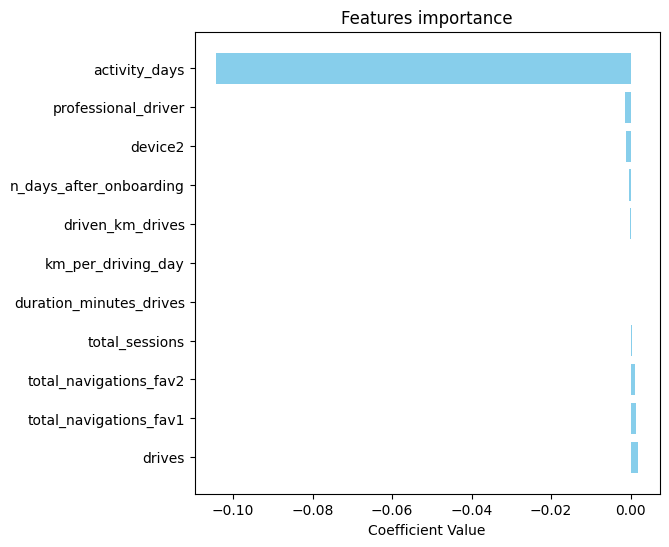

In [45]:
# Plot the feature importances
plt.figure(figsize=(6,6))
feature_names, coefficients = zip(*temp_list)
plt.barh(feature_names, coefficients, color='skyblue')

plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.title("Features importance")

plt.gca().invert_yaxis()
plt.show()

### **Task 4c. Conclusion**

Now that you've built your regression model, the next step is to share your findings with the Waze leadership team. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. What variable most influenced the model's prediction? How? Was this surprising?

        The most influence from "activity_days" - the more user use app the less likely he quit

2. Were there any variables that you expected to be stronger predictors than they were?

        Number of drives was expected to have more influence

3. Why might a variable you thought to be important not be important in the model?

        I suspect that the model failed to find right pattern, it can ve checked with dummy_nodel with majority class strategy, to see and compare the score from tht model and if our model any how better (or worse)

4. Would you recommend that Waze use this model? Why or why not?

        I will not reccomend to use this version of the model, and try to investigate further and improve model performance, maybe enginering new features or mayve impled some regularization

5. What could you do to improve this model?

        Recall is really low, the model tend to fail with negative class prediction which is the reason we create this model

6. What additional features would you like to have to help improve the model?

        Adding data from ordiacnary statistical user might help. maybe support conditions and related to custom service 
        information...
